# Machine Learning: Assignment #1 

Bárbara Nóbrega Galiza – 202408654​

Cláudia Oliveira - 202005668​

Marta Campos - 202008344

What will vary:

• number of instances (rows in your dataset table)

• number of classes (for multi-class classification problems)

• proportion of classes (balanced and imbalanced class problem)

• distribution of points within each class (shape of point clouds)

• shape of the border between the class regions, from linear to whatever

• level of noise

• level of overlap between the classes

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import tree
from matplotlib import pyplot as plt

In [8]:
def evaluation(y,y_pred):
    # Scores
    print("classification report: \n", classification_report(y,y_pred))
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6)) 
    # Confusion Matrix
    sns.heatmap(confusion_matrix(y, y_pred), 
            annot=True, fmt="d", cmap="Blues", cbar=False, square=True, ax=axes[0])
    axes[0].set_title("Confusion Matrix")
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y, y_pred)
    auc_score = roc_auc_score(y, y_pred)

    axes[1].plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.4f})", color="blue")
    axes[1].plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guessing")
    axes[1].set_title("Receiver Operating Characteristic (ROC) Curve")
    axes[1].set_xlabel("False Positive Rate (FPR)")
    axes[1].set_ylabel("True Positive Rate (TPR)")
    axes[1].legend(loc="lower right")
    axes[1].grid()

    plt.tight_layout()
    plt.show()

### Linear regression

• number of instances (rows in your dataset table)

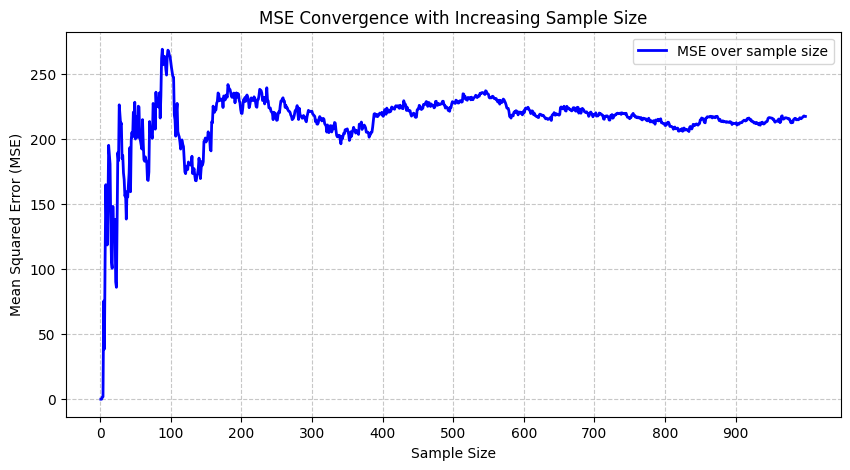

In [ ]:
mse_values = []
sample_sizes = []

for i in range(1,1000):
    X, y = make_regression(n_samples=i, n_features= 2, noise=15, random_state=42)
    y = y.reshape(-1, 1)
    m = X.shape[0]

    X_b = np.c_[np.ones((m, 1)), X]  
    theta = np.array([[2.0], [3.0], [1.5]])
    learning_rate = 0.1
    n_iterations = 100

    # Performing Gradient Descent
    for _ in range(n_iterations):
        # Predictions
        y_pred = X_b.dot(theta)
        # Computing the gradient
        gradients = (2 / m) * X_b.T.dot(y_pred - y)
        # Updating parameters
        theta -= learning_rate * gradients

    y_pred = X_b.dot(theta)
    

    mse = np.mean((y_pred - y) ** 2)

    mse_values.append(mse)
    sample_sizes.append(i)
    
plt.figure(figsize=(10, 5))
plt.plot(sample_sizes, mse_values, color='blue', linewidth=2, label='MSE over sample size')
plt.xlabel('Sample Size')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Convergence with Increasing Sample Size')
plt.xticks(np.arange(0, 1000, 100))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

### Logistic Regression

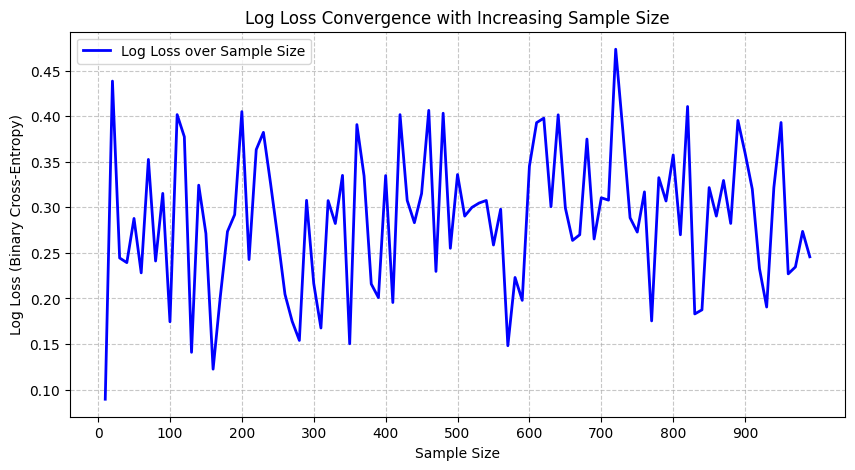

In [ ]:
log_loss_values = []
sample_sizes = []

for i in range(10, 1000,10):
    # Generate synthetic binary classification data
    X, y = make_classification(n_samples=i, n_features=2, n_informative=2, 
                               n_redundant=0, n_clusters_per_class=1, random_state=42)
    y = y.reshape(-1, 1)
    m = X.shape[0]
    
    # Add bias term to feature matrix
    X_b = np.c_[np.ones((m, 1)), X]
    
    # Initialize theta with arbitrary values
    theta = np.random.randn(3, 1)
    learning_rate = 0.1
    n_iterations = 100
    
    # Gradient Descent for Logistic Regression
    for _ in range(n_iterations):
        z = X_b.dot(theta)
        probs = 1 / (1 + np.exp(-z))  # Sigmoid function
        gradients = (1 / m) * X_b.T.dot(probs - y)
        theta -= learning_rate * gradients
    
    # Compute log loss
    eps = 1e-9  # Prevent log(0)
    log_loss = -np.mean(y * np.log(probs + eps) + (1 - y) * np.log(1 - probs + eps))
    
    log_loss_values.append(log_loss)
    sample_sizes.append(i)
    
plt.figure(figsize=(10, 5))
plt.plot(sample_sizes, log_loss_values, color='blue', linewidth=2, label='Log Loss over Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Log Loss (Binary Cross-Entropy)')
plt.title('Log Loss Convergence with Increasing Sample Size')
plt.xticks(np.arange(0, 1000, 100))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


### LDA

• Number of classes 

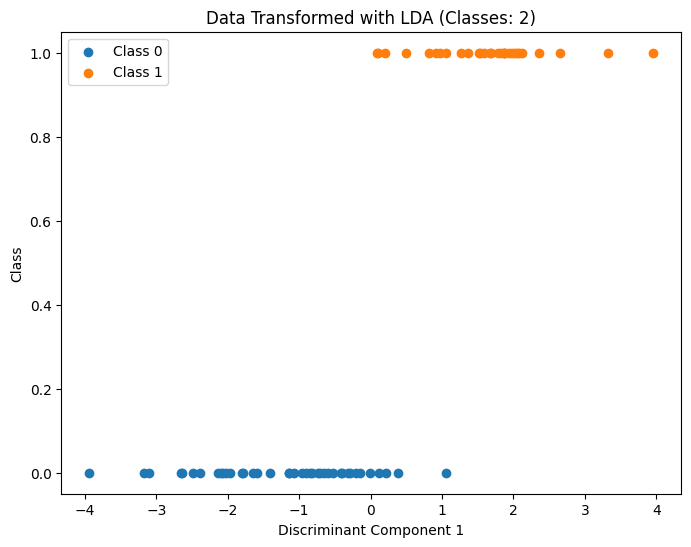

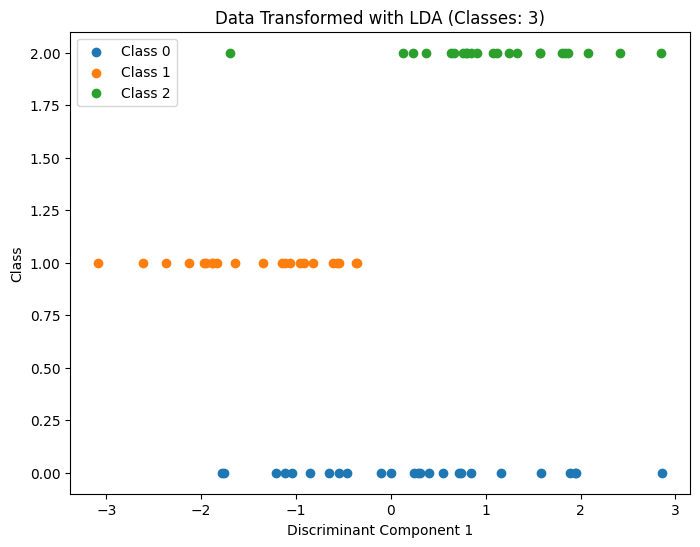

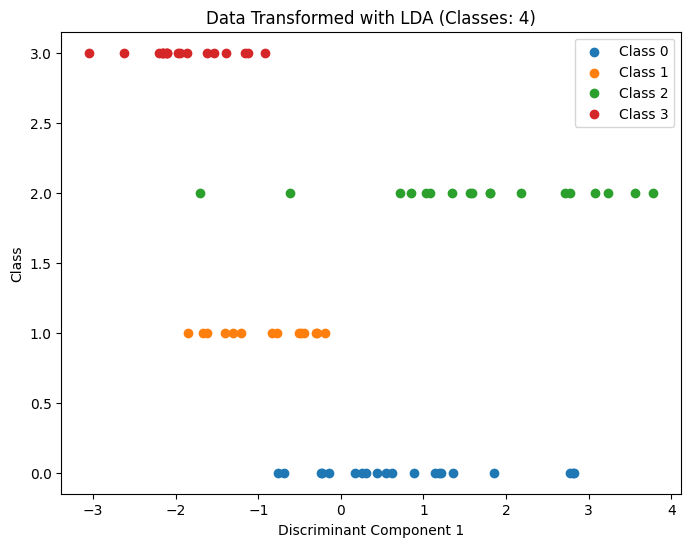

In [13]:
n_classes_list = [2, 3, 4]  

for n_classes in n_classes_list:

    X, y = make_classification(n_samples=100, n_features=5, n_classes=n_classes, 
                                n_clusters_per_class=1, 
                                n_informative=3, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)
    X_train_lda = lda.transform(X_train)
    X_test_lda = lda.transform(X_test)

    plt.figure(figsize=(8, 6))
    for class_label in range(n_classes):
        plt.scatter(
            X_train_lda[y_train == class_label, 0], 
            np.full_like(X_train_lda[y_train == class_label, 0], class_label), 
            label=f'Class {class_label}'
        )

    plt.title(f"Data Transformed with LDA (Classes: {n_classes})")
    plt.xlabel('Discriminant Component 1')
    plt.ylabel('Class')
    plt.legend()
    plt.show()

### QDA

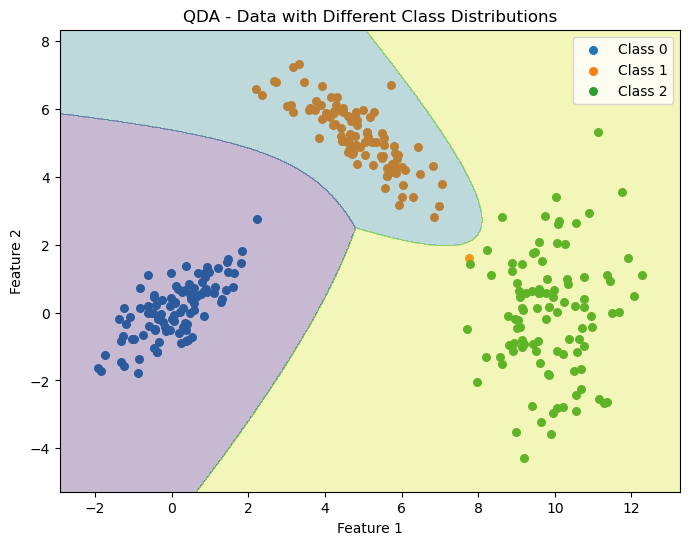

In [11]:
n_classes = 3
np.random.seed(42)

# Generate synthetic data with different covariance matrices for each class (all are gaussian but with diff parameters)
n_samples = 100
n_features = 2  
X_class_0 = np.random.multivariate_normal([0, 0], [[1, 0.8], [0.8, 1]], n_samples)
X_class_1 = np.random.multivariate_normal([5, 5], [[1, -0.8], [-0.8, 1]], n_samples)
X_class_2 = np.random.multivariate_normal([10, 0], [[1, 0], [0, 3]], n_samples)

# Combine data from all classes
X = np.vstack([X_class_0, X_class_1, X_class_2])
y = np.array([0]*n_samples + [1]*n_samples + [2]*n_samples)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Plot the data points and decision boundaries
plt.figure(figsize=(8, 6))

# Plot points for each class
for class_label in range(n_classes):
    plt.scatter(X[y == class_label, 0], X[y == class_label, 1], label=f'Class {class_label}', s=30)

# Create a mesh grid to plot the decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict class for each point in the grid
Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3)
plt.title("QDA - Data with Different Class Distributions")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

### Decision Tree without pruning

In [36]:
def plottree(model):
    plt.subplots(nrows = 1,ncols = 1,figsize = (7,7), dpi=200)
    tree.plot_tree(model, fontsize=5, filled=True)
    plt.show()

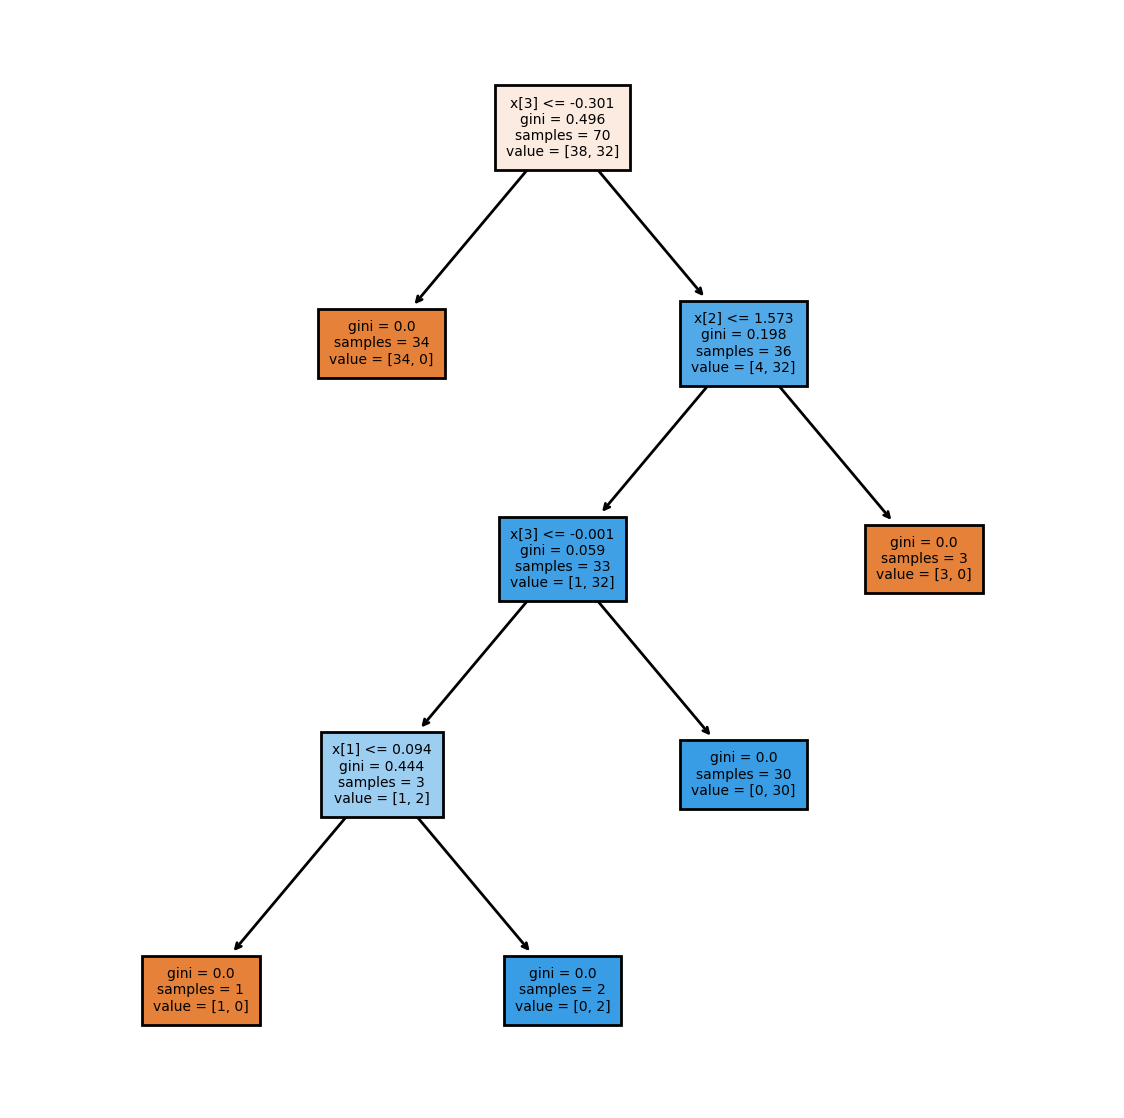

classification report: 
               precision    recall  f1-score   support

           0       0.69      0.92      0.79        12
           1       0.93      0.72      0.81        18

    accuracy                           0.80        30
   macro avg       0.81      0.82      0.80        30
weighted avg       0.83      0.80      0.80        30



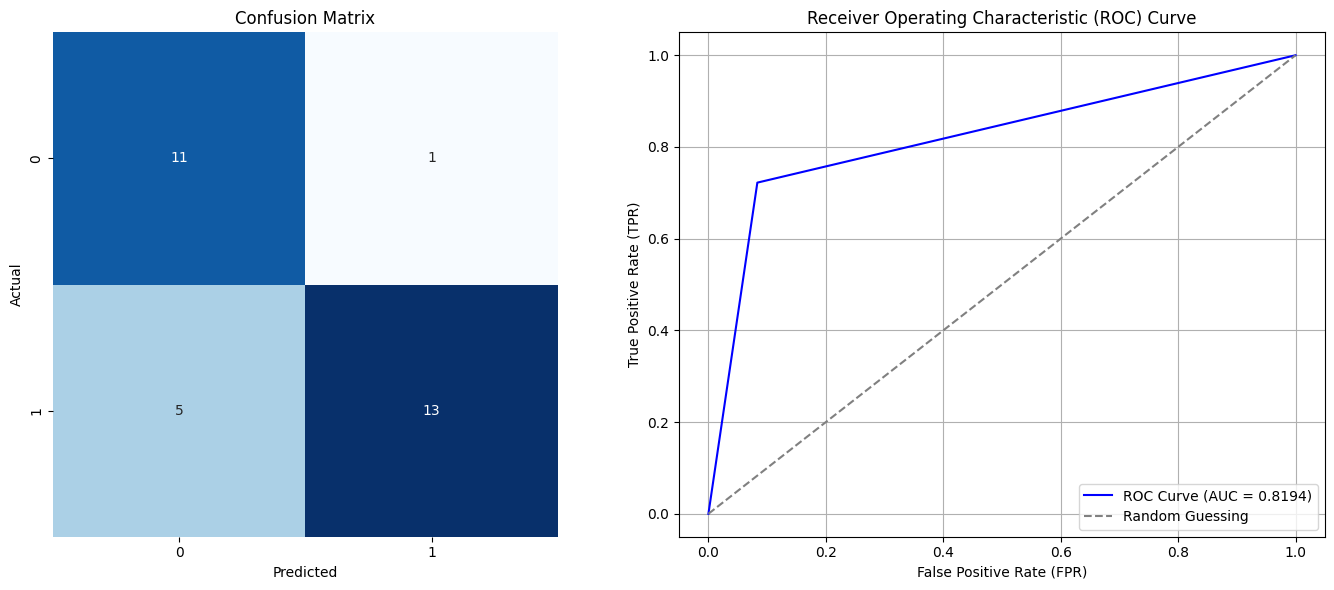

In [37]:
X, y = make_classification(n_samples=100, n_features=5, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

plottree(dt)

evaluation(y_test,y_pred)

• level of overlap between the classes

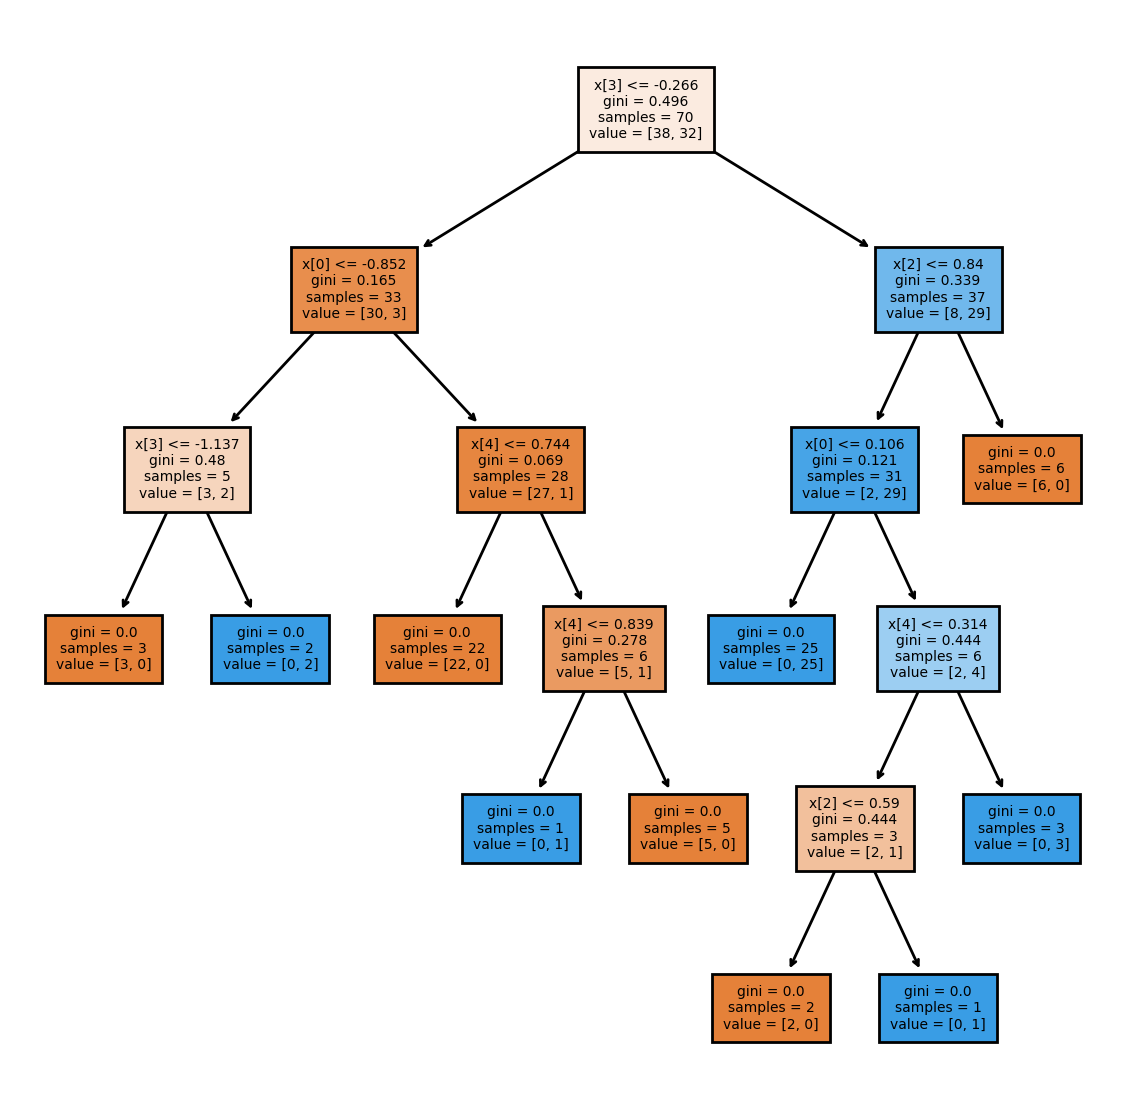

classification report: 
               precision    recall  f1-score   support

           0       0.58      0.92      0.71        12
           1       0.91      0.56      0.69        18

    accuracy                           0.70        30
   macro avg       0.74      0.74      0.70        30
weighted avg       0.78      0.70      0.70        30



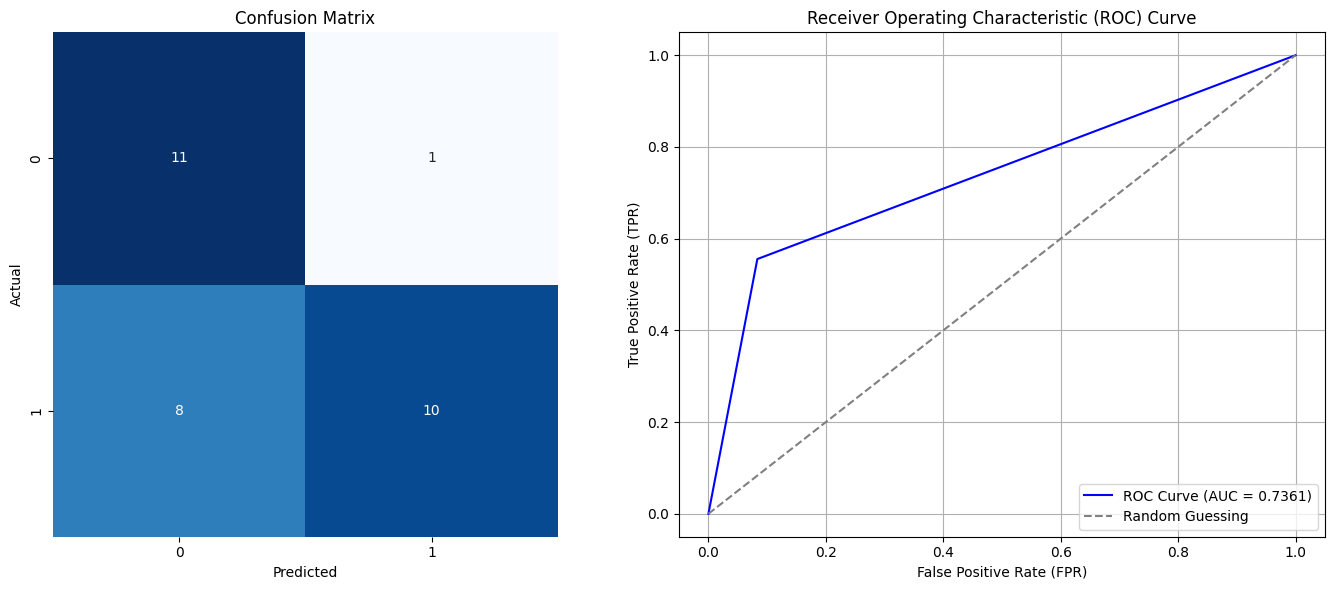

In [38]:
X, y = make_classification(n_samples=100, n_features=5, n_classes=2,class_sep=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

plottree(dt)

evaluation(y_test,y_pred)

### Decision Tree with a maximum depth of 2

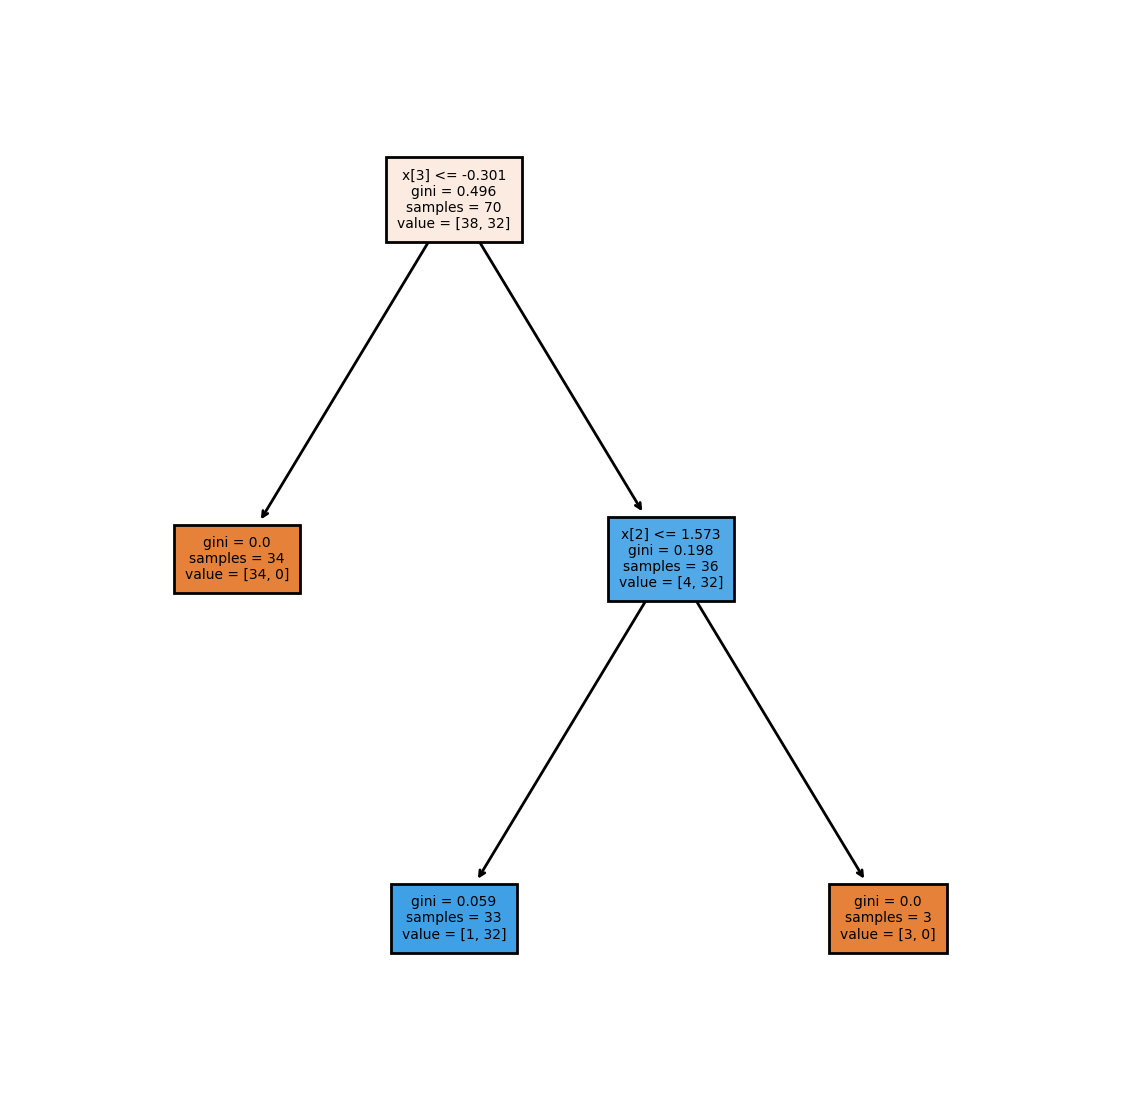

classification report: 
               precision    recall  f1-score   support

           0       0.69      0.92      0.79        12
           1       0.93      0.72      0.81        18

    accuracy                           0.80        30
   macro avg       0.81      0.82      0.80        30
weighted avg       0.83      0.80      0.80        30



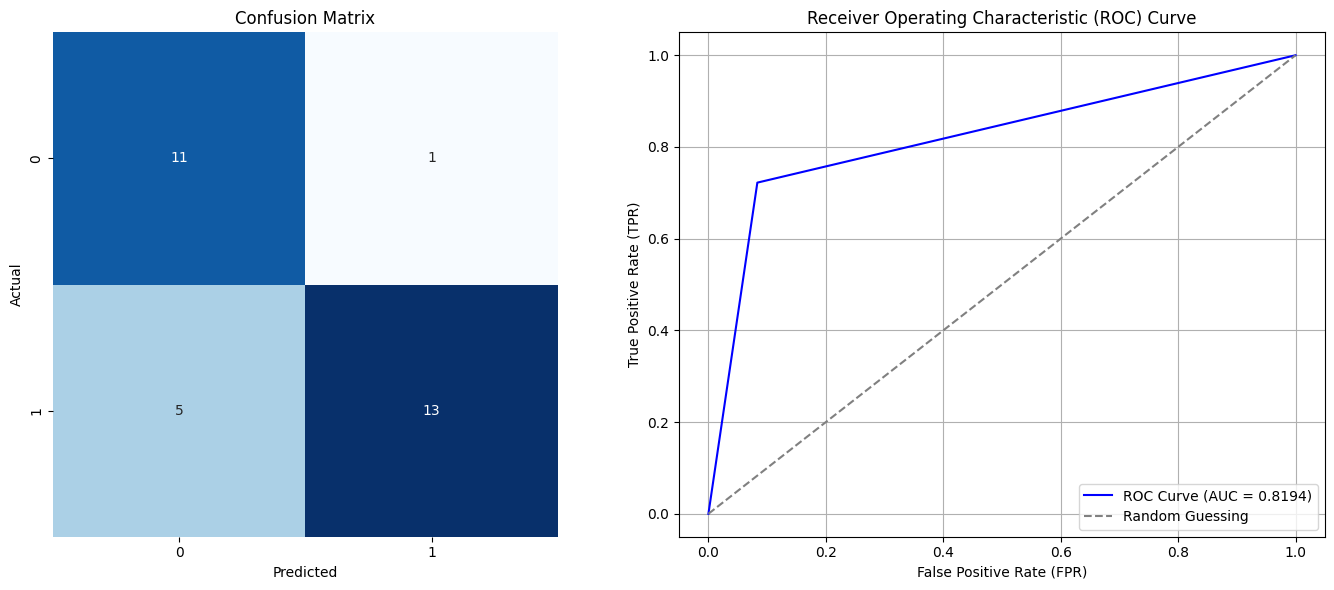

In [39]:
X, y = make_classification(n_samples=100, n_features=5, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt = DecisionTreeClassifier(max_depth=2, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

plottree(dt)

evaluation(y_test,y_pred)

• proportion of classes (balanced and imbalanced class problem)

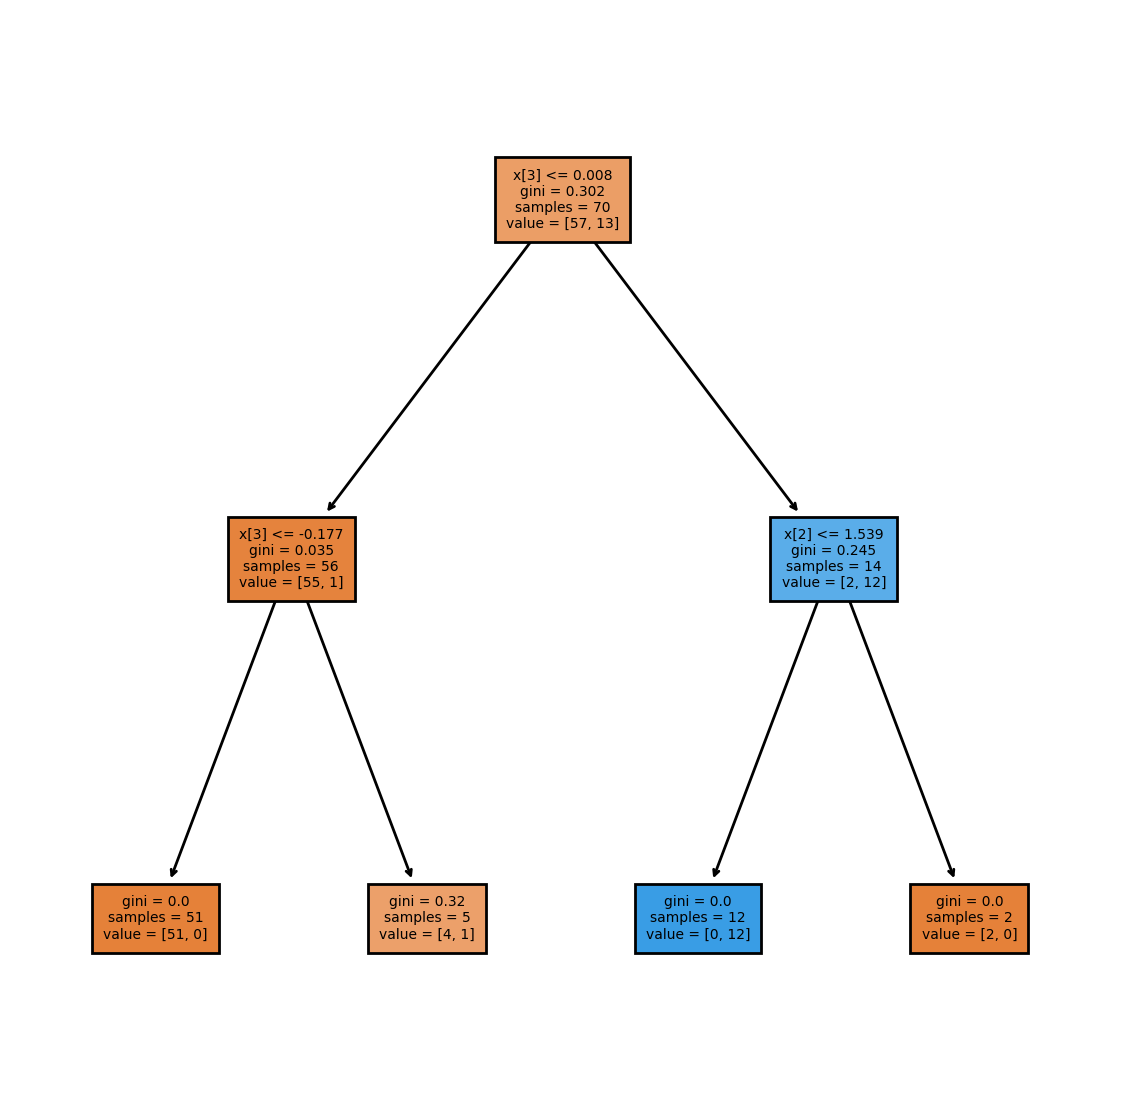

classification report: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.94      0.98      0.96        30
weighted avg       0.97      0.97      0.97        30



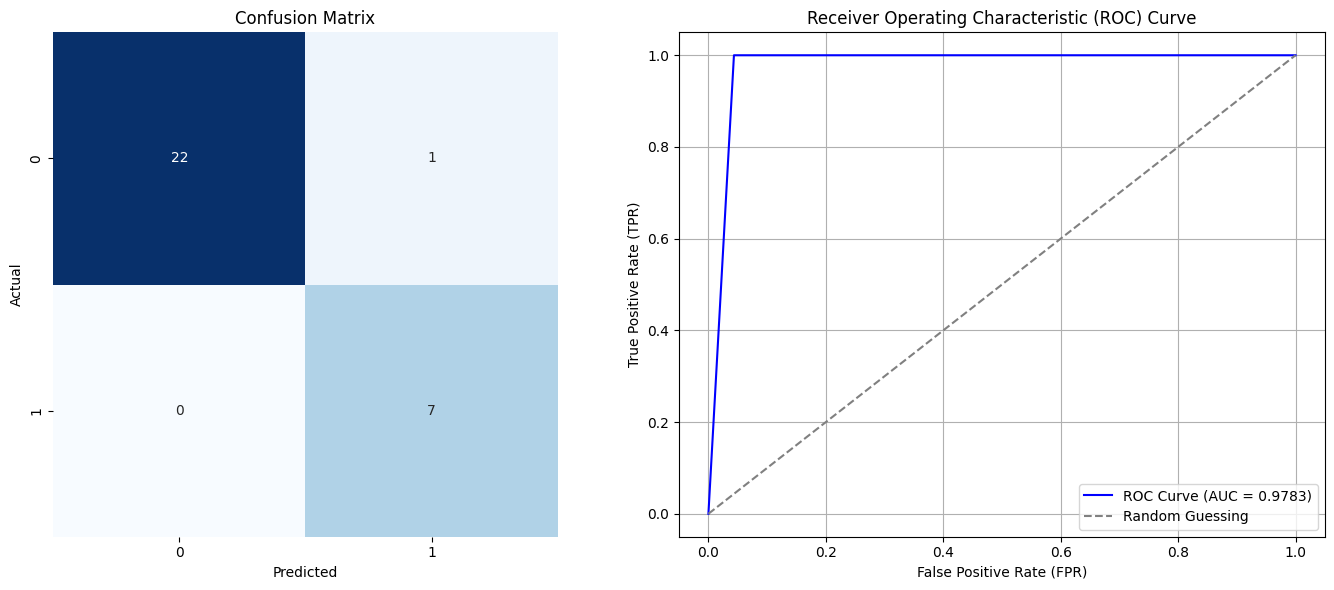

In [40]:
X, y = make_classification(n_samples=100, n_features=5, n_classes=2, weights=[0.8, 0.2], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt = DecisionTreeClassifier(max_depth=2, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

plottree(dt)

evaluation(y_test,y_pred)

### SVM linear

class_sep = 3, good separation, small overlap.

- Level of overlap between the classes

classification report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        75
           1       1.00      0.99      0.99        75

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



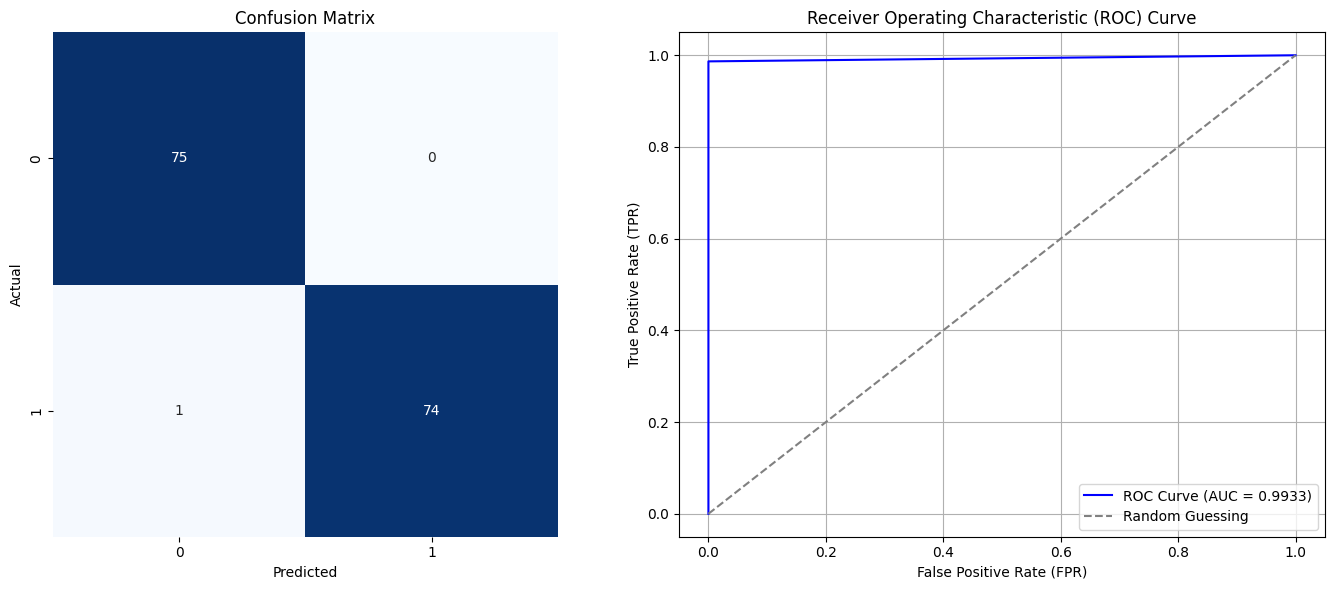

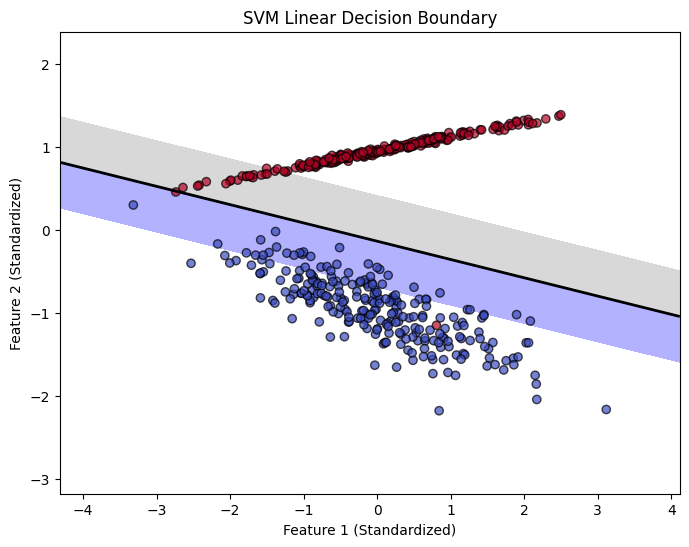

In [27]:
#X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, class_sep=2, random_state=42)
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_clusters_per_class=1, class_sep=3, random_state=42)
X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

svm = LinearSVC(random_state=42, class_weight="balanced", dual=False)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

evaluation(y_test,y_pred)

plt.figure(figsize=(8, 6))

# Create grid of points
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Compute decision boundary
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot contour and dataset
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], colors=['blue', 'gray', 'red'], alpha=0.3)
plt.contour(xx, yy, Z, levels=[0], colors='black', linewidths=2)  # Decision boundary

# Scatter plot of data points
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap="coolwarm", edgecolors="k", alpha=0.7)

plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.title("SVM Linear Decision Boundary")
plt.show()

class_sep = 1, small separation, greater overlap.

classification report: 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85        75
           1       0.87      0.81      0.84        75

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150



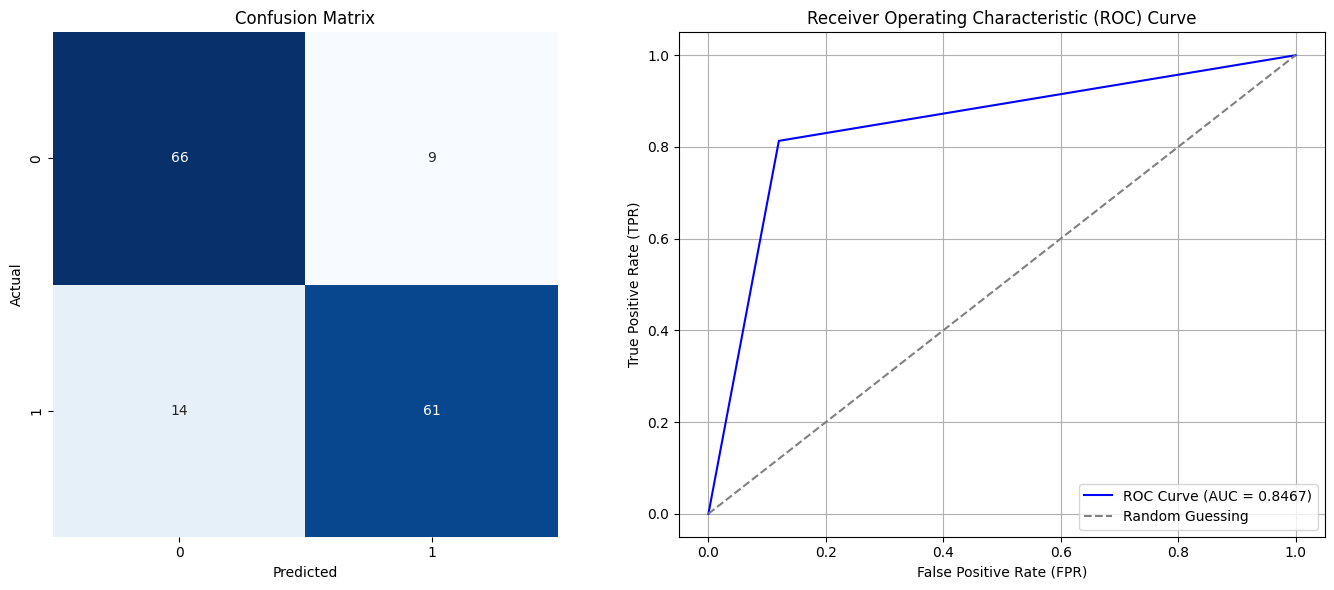

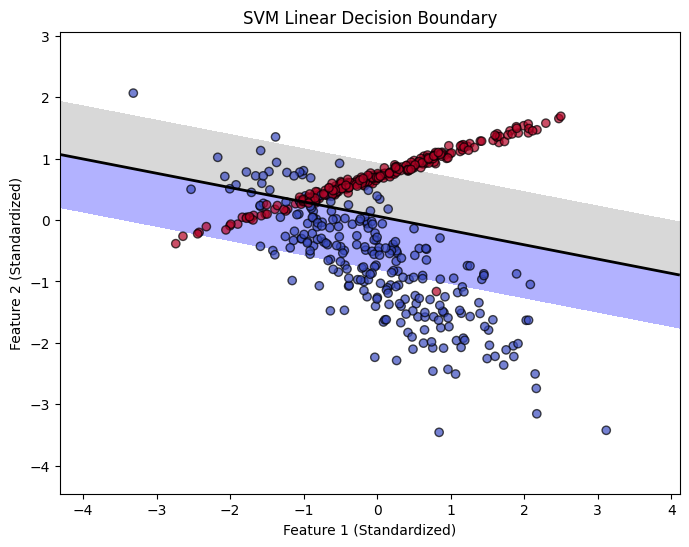

In [28]:
#X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, class_sep=2, random_state=42)
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_clusters_per_class=1, class_sep=1, random_state=42)
X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

svm = LinearSVC(random_state=42, class_weight="balanced", dual=False)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

evaluation(y_test,y_pred)

plt.figure(figsize=(8, 6))

# Create grid of points
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Compute decision boundary
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot contour and dataset
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], colors=['blue', 'gray', 'red'], alpha=0.3)
plt.contour(xx, yy, Z, levels=[0], colors='black', linewidths=2)  # Decision boundary

# Scatter plot of data points
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap="coolwarm", edgecolors="k", alpha=0.7)

plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.title("SVM Linear Decision Boundary")
plt.show()

### SVM Linear x RBF 

- shape of the border between the class regions, from linear to circular

classification report: 
               precision    recall  f1-score   support

           0       0.47      0.51      0.49        75
           1       0.47      0.44      0.46        75

    accuracy                           0.47       150
   macro avg       0.47      0.47      0.47       150
weighted avg       0.47      0.47      0.47       150



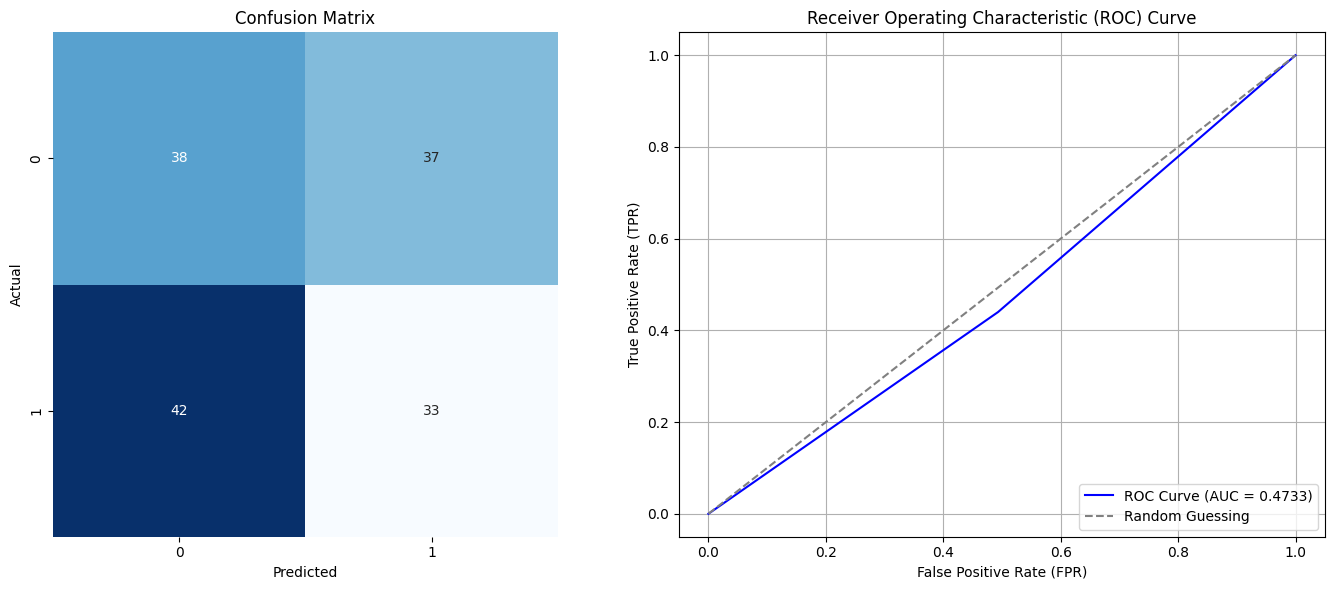

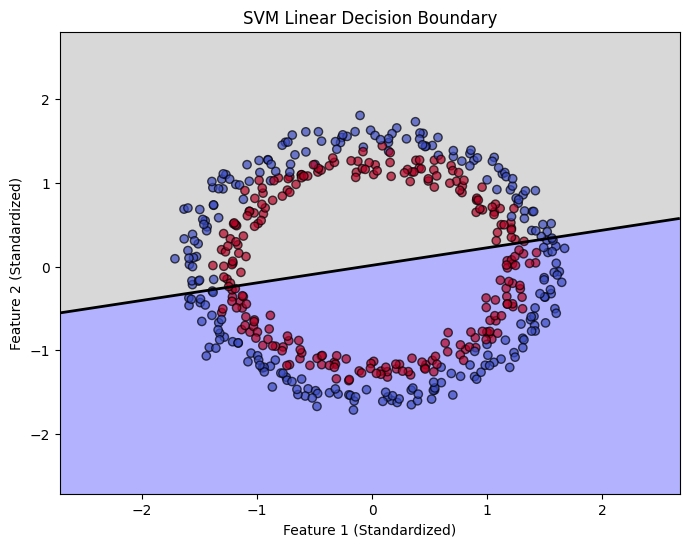

In [29]:
X, y = make_circles(n_samples=500, noise=0.05, factor=0.8, random_state=42)
X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

svm = LinearSVC(random_state=42, class_weight="balanced", dual=False)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

evaluation(y_test,y_pred)

plt.figure(figsize=(8, 6))

# Create grid of points
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Compute decision boundary
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot contour and dataset
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], colors=['blue', 'gray', 'red'], alpha=0.3)
plt.contour(xx, yy, Z, levels=[0], colors='black', linewidths=2)  # Decision boundary

# Scatter plot of data points
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap="coolwarm", edgecolors="k", alpha=0.7)

plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.title("SVM Linear Decision Boundary")
plt.show()

classification report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        75
           1       0.97      0.93      0.95        75

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



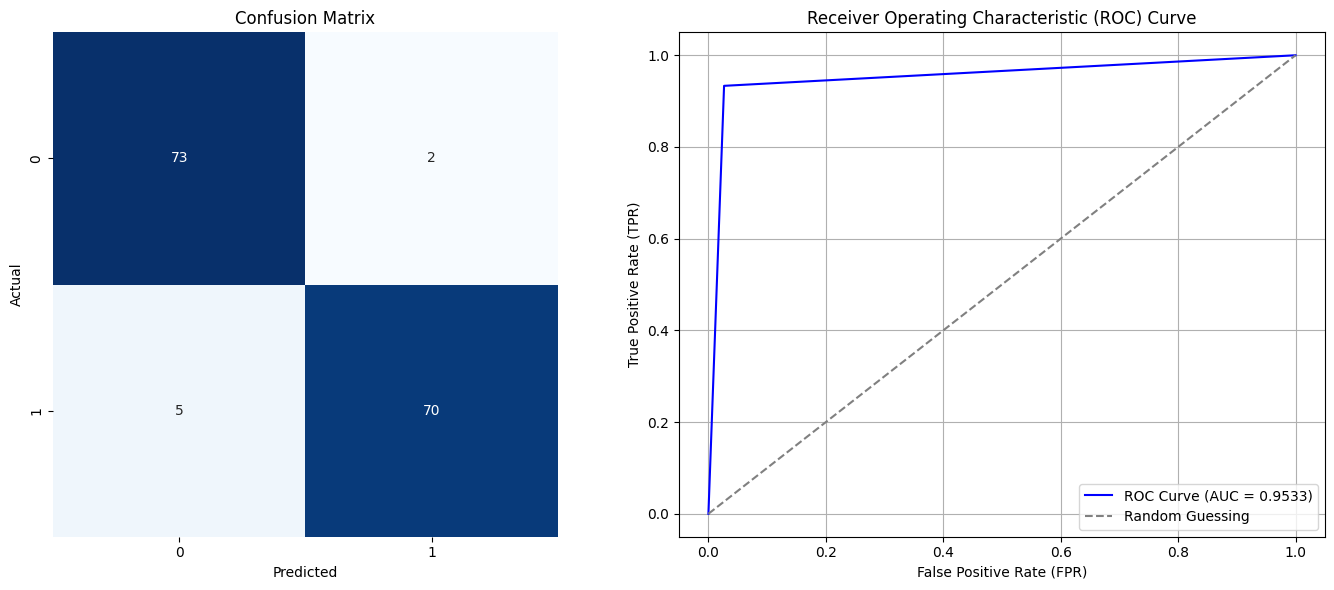

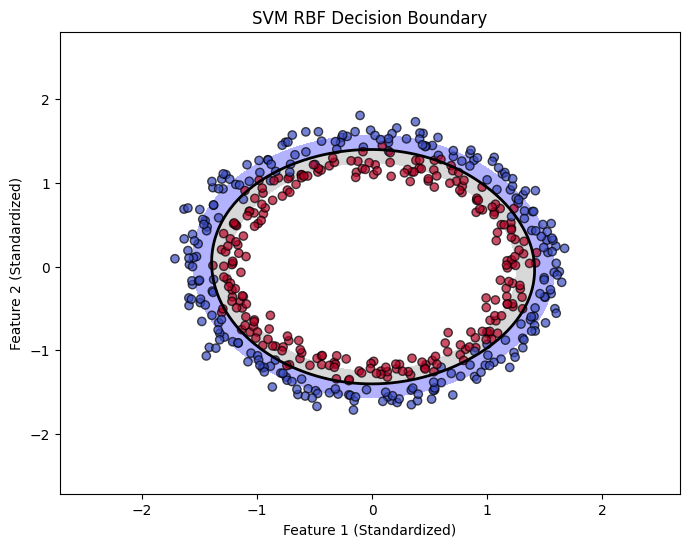

In [31]:
X, y = make_circles(n_samples=500, noise=0.05, factor=0.8, random_state=42)
X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

svm = SVC(random_state=42, kernel="rbf", class_weight="balanced")
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

evaluation(y_test,y_pred)

plt.figure(figsize=(8, 6))

# Create grid of points
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Compute decision boundary
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot contour and dataset
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], colors=['blue', 'gray', 'red'], alpha=0.3)
plt.contour(xx, yy, Z, levels=[0], colors='black', linewidths=2)  # Decision boundary

# Scatter plot of data points
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap="coolwarm", edgecolors="k", alpha=0.7)

plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.title("SVM RBF Decision Boundary")
plt.show()

Changing the Noise

classification report: 
               precision    recall  f1-score   support

           0       0.66      0.64      0.65        75
           1       0.65      0.67      0.66        75

    accuracy                           0.65       150
   macro avg       0.65      0.65      0.65       150
weighted avg       0.65      0.65      0.65       150



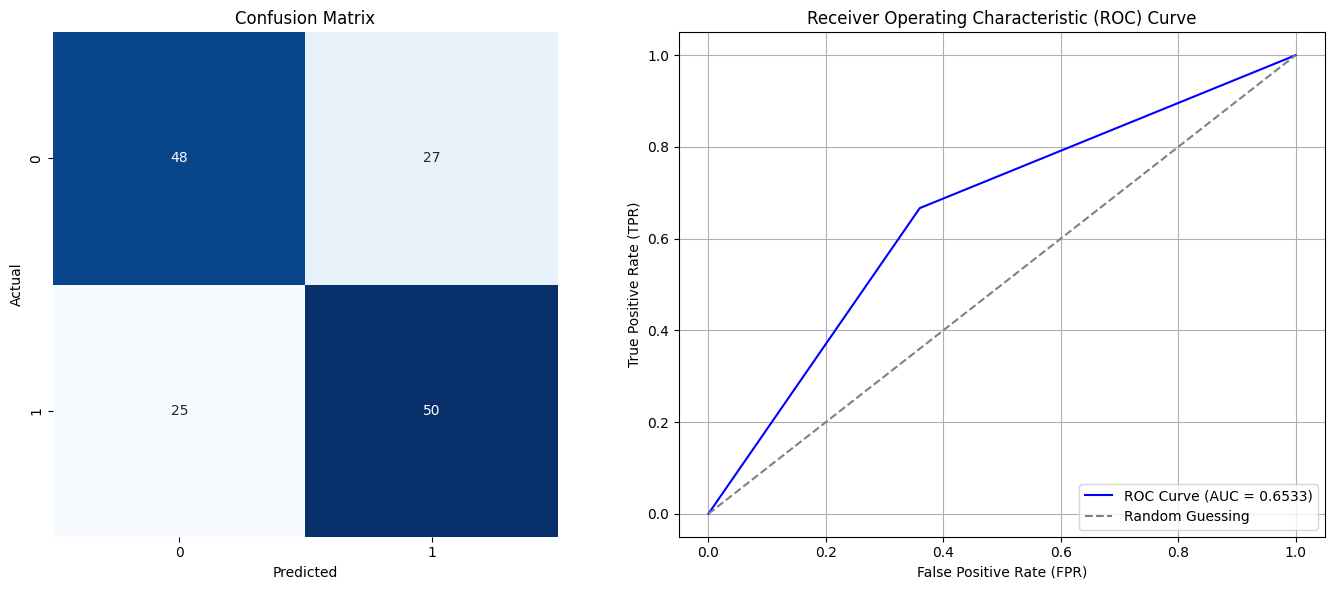

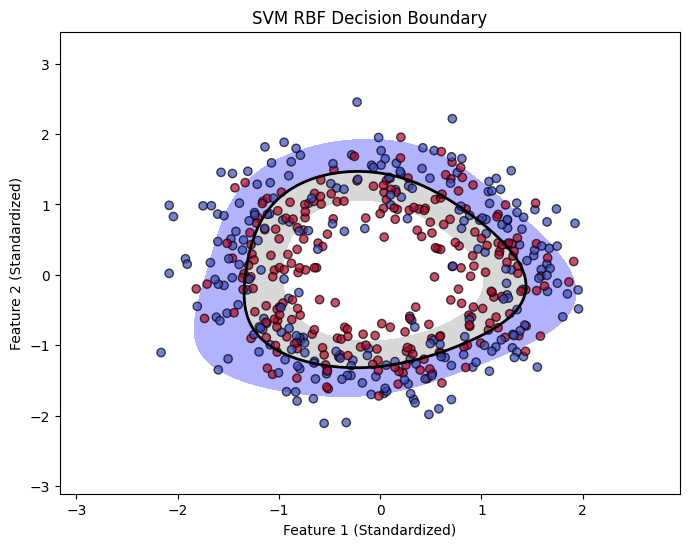

In [47]:
X, y = make_circles(n_samples=500, noise=0.2, factor=0.8, random_state=42)
X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

svm = SVC(random_state=42, kernel="rbf", class_weight="balanced")
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

evaluation(y_test,y_pred)

plt.figure(figsize=(8, 6))

# Create grid of points
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Compute decision boundary
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot contour and dataset
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], colors=['blue', 'gray', 'red'], alpha=0.3)
plt.contour(xx, yy, Z, levels=[0], colors='black', linewidths=2)  # Decision boundary

# Scatter plot of data points
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap="coolwarm", edgecolors="k", alpha=0.7)

plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.title("SVM RBF Decision Boundary")
plt.show()